In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# scikit-learn imports
from sklearn import datasets                          # to import iris dataset
from sklearn.model_selection import train_test_split  # to split data into training/test sets
from sklearn.preprocessing import StandardScaler      # for feature scaling
from sklearn.linear_model import Perceptron           # to train perceptron model
from sklearn.metrics import accuracy_score            # to calculate accuracy metrics

# import plot_decision_regions function
from helper import plot_decision_regions

In [6]:
# load iris dataset
iris = datasets.load_iris()

# assign matrix X and vector y
X = iris.data[:, [2, 3]]
y = iris.target

# print class labels
print('Class labels:', np.unique(y))


Class labels: [0 1 2]


In [7]:
# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [8]:
# verify proportion of class labels are the same in training and test sets
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [9]:
# initialize and fit object
sc = StandardScaler()
sc.fit(X_train)

# standardize features
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [10]:
# initialize and train perceptron
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
# make predictions
y_pred = ppn.predict(X_test_std)

# print number of misclassified samples
print(f'Misclassified samples: {(y_test != y_pred).sum()}')

Misclassified samples: 1


In [12]:
# print classification accuracy of test set predictions ...
# ... using accuracy_score
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

Accuracy: 0.98


In [13]:
# print classification accuracy of test set predictions ...
# ... using pnn.score
print(f'Accuracy: {ppn.score(X_test_std, y_test):.2f}')

Accuracy: 0.98


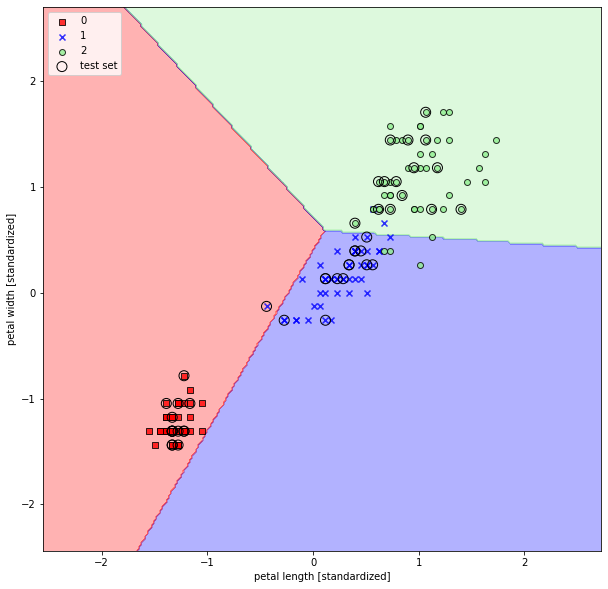

In [14]:
# combine training and test datasets
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# plot decision regions
plt.figure(figsize=(10, 10))
plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=ppn, 
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()